<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_teste_004_nov_08_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features

In [0]:
# https://buildmedia.readthedocs.org/media/pdf/mahotas/latest/mahotas.pdf

# Why there are only 13 features implemented? (pag 42)
# Only the first 13 features are implemented. The last (14th) feature is 
# normally considered to be unstable, although it
# is not clear to me why this is. (See this unanswered question on Cross-validated).

# What mahotas.features.haralick return as answer?  (pag 58)
# mahotas.features.haralick returns features in 4 directions. 
# We just take the mean (sometimes you use the spread ptp() too).

# Who uses mahotas? (pag 62)
# In June 2016, there were 34 papers citing the mahotas paper




In [0]:
images = ('hubble_deep_field',
          'immunohistochemistry',
          'microaneurysms',
          'moon',
          'retina')
caller = getattr(data, images[4])
image = caller()

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']
Mahotas =pd.DataFrame(mahotas.features.haralick(image), columns =Nomes)

In [5]:
print(Mahotas)

         ASM    constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.015965     6.426415  0.999452  ...     2.011315 -0.658899  0.999928
1   0.015042    11.980861  0.998978  ...     2.317360 -0.610684  0.999863
2   0.016155     6.180067  0.999473  ...     1.932706 -0.671126  0.999939
3   0.015076    11.616170  0.999009  ...     2.299061 -0.613425  0.999868
4   0.009879  6236.057486  0.364507  ...     5.857769 -0.294217  0.989769
5   0.009913  6246.183988  0.363298  ...     5.898624 -0.280109  0.987671
6   0.009887  6247.766785  0.363141  ...     5.905899 -0.278668  0.987431
7   0.009889  6257.427252  0.361977  ...     5.920880 -0.274740  0.986771
8   0.009890  6251.722946  0.362559  ...     5.904230 -0.278622  0.987438
9   0.009910  6244.108317  0.363509  ...     5.901138 -0.279984  0.987650
10  0.009890  6242.236141  0.363704  ...     5.888625 -0.282506  0.988057
11  0.009883  6249.916788  0.362743  ...     5.905857 -0.278486  0.987415
12  0.009884  6255.125330  0.362212  .

In [6]:
GLCM=[]
for i in Nomes:
  GLCM.append(Mahotas[i].mean())
glcm_haralick=pd.DataFrame(GLCM,index=Nomes)
print(glcm_haralick)



                         0
ASM               0.011636
constrast      4328.211427
correl            0.558812
variance       5199.945084
inv diff mom      0.258144
sum aveg        170.509695
sum var       16471.568908
sum entropy       7.372673
entropy          10.695967
dif var           0.000439
dif entropy       4.743431
IMC1             -0.390490
IMC2              0.991431


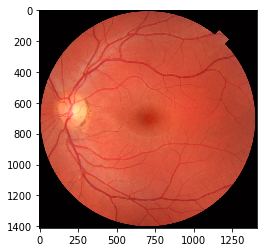

In [7]:
plt.imshow(image)